# Model Evaluation - English 3

## 0. Imports

In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split

from data_analyzing.data_analyzer import DataAnalyzer
from evaluation.model_evaluator import ModelEvaluator
from training.model import Model

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/adamdabkowski/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/adamdabkowski/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/adamdabkowski/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## 1. Loading dataset

In [2]:
COVID_PREPROCESSED_DATA_PATH = "/Users/adamdabkowski/PycharmProjects/NLP-Project/data/preprocessed/covid"

In [3]:
data_json = pd.read_json(COVID_PREPROCESSED_DATA_PATH, orient="records", lines=True)

In [4]:
# dataset_1 = data_json.loc[data_json['label'] == 1].head(20)
# dataset_0 = data_json.loc[data_json['label'] == 0].head(20)

dataset_1 = data_json.loc[data_json['label'] == 1].head(476)
dataset_0 = data_json.loc[data_json['label'] == 0].head(476)

dataset = pd.concat([dataset_1, dataset_0])
dataset = dataset.sample(frac=1, random_state=10)

In [5]:
train_data, test_data = train_test_split(dataset, train_size=0.8, random_state=42)

## 2. Loading model

In [6]:
COVID_MODEL_V3_PATH = "/Users/adamdabkowski/PycharmProjects/NLP-Project/model/covid/model_v3.h5py"

In [7]:
model_covid_v3 = Model.load_saved_model(COVID_MODEL_V3_PATH, useGPU=False)

2023-05-25 17:13:30.363286: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
All model checkpoint layers were used when initializing TFDistilBertForSequenceClassification.

All the layers of TFDistilBertForSequenceClassification were initialized from the model checkpoint at /Users/adamdabkowski/PycharmProjects/NLP-Project/model/covid/model_v3.h5py.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForSequenceClassification for predictions without further training.


#### 2.1 Train data

Accuracy:   1.0
Precision:  1.0
Recall:     1.0
F1 score:   1.0




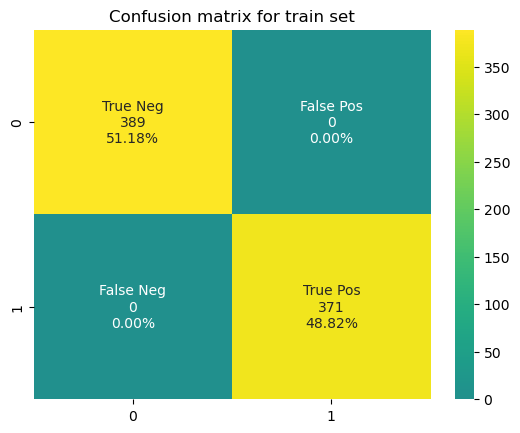

([1.0, 1.0, 1.0, 1.0],
 [1,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  

In [8]:
ModelEvaluator.evaluate(
    model=model_covid_v3,
    dataset=train_data,
    set_type="train"
)

#### 2.2 Test data

Accuracy:   0.93158
Precision:  0.98913
Recall:     0.8835
F1 score:   0.93333




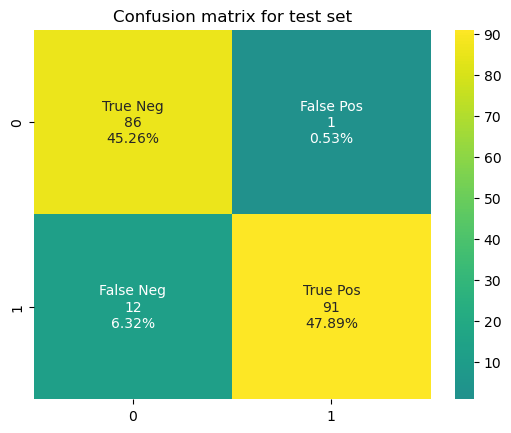

In [9]:
scores, y_true, y_pred = ModelEvaluator.evaluate(
    model=model_covid_v3,
    dataset=test_data,
    set_type="test"
)

In [10]:
test_data_correctly_predicted_model_v3 = ModelEvaluator.get_correctly_predicted_elements(
    dataset=test_data,
    y_true=y_true,
    y_pred=y_pred
)

In [11]:
test_data_false_predicted_model_v3 = ModelEvaluator.get_false_predicted_elements(
    dataset=test_data,
    y_true=y_true,
    y_pred=y_pred
)

## 3. Results Analyzing

#### 3.1 Polarity

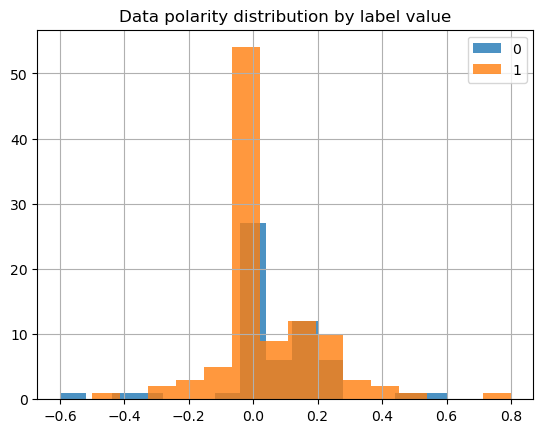

In [12]:
DataAnalyzer.plot_polarity_distribution(dataset=test_data_correctly_predicted_model_v3)

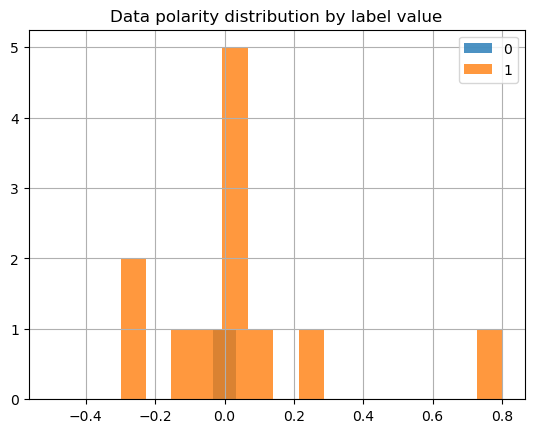

In [13]:
DataAnalyzer.plot_polarity_distribution(dataset=test_data_false_predicted_model_v3)

#### 3.2 Subjectivity

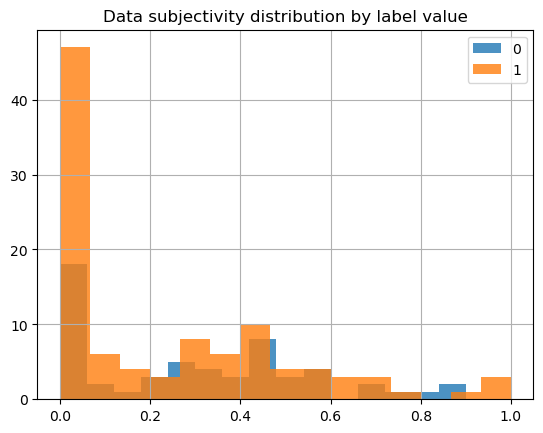

In [14]:
DataAnalyzer.plot_subjectivity_distribution(dataset=test_data_correctly_predicted_model_v3)

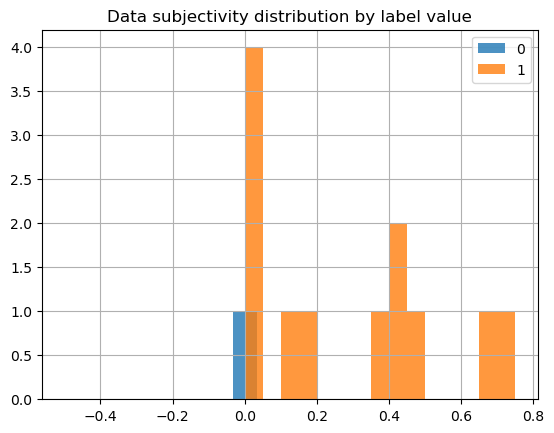

In [15]:
DataAnalyzer.plot_subjectivity_distribution(dataset=test_data_false_predicted_model_v3)

#### 3.3 Most Popular Words map

In [16]:
most_popular_words_correct = DataAnalyzer.get_most_popular_words(
    dataset=test_data_correctly_predicted_model_v3,
    language="english",
    most_popular_words_num=100,
    label_type=None
)

In [17]:
most_popular_words_false = DataAnalyzer.get_most_popular_words(
    dataset=test_data_false_predicted_model_v3,
    language="english",
    most_popular_words_num=100,
    label_type=None
)

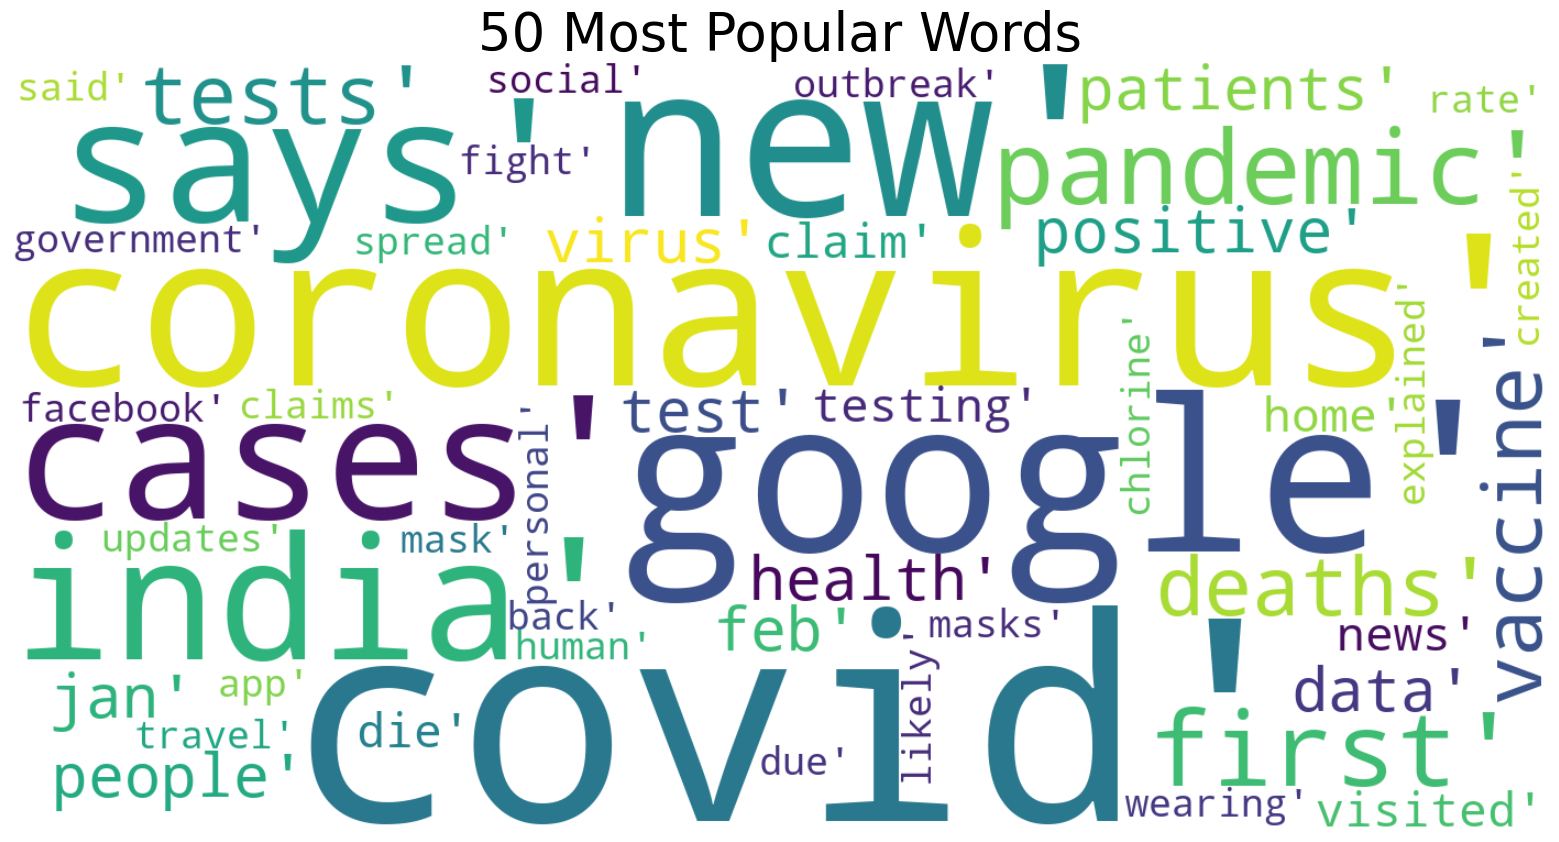

In [ ]:
DataAnalyzer.plot_most_popular_words_map(
    most_popular_words=most_popular_words_correct,
    most_popular_words_num=50,
    label_type=None
)

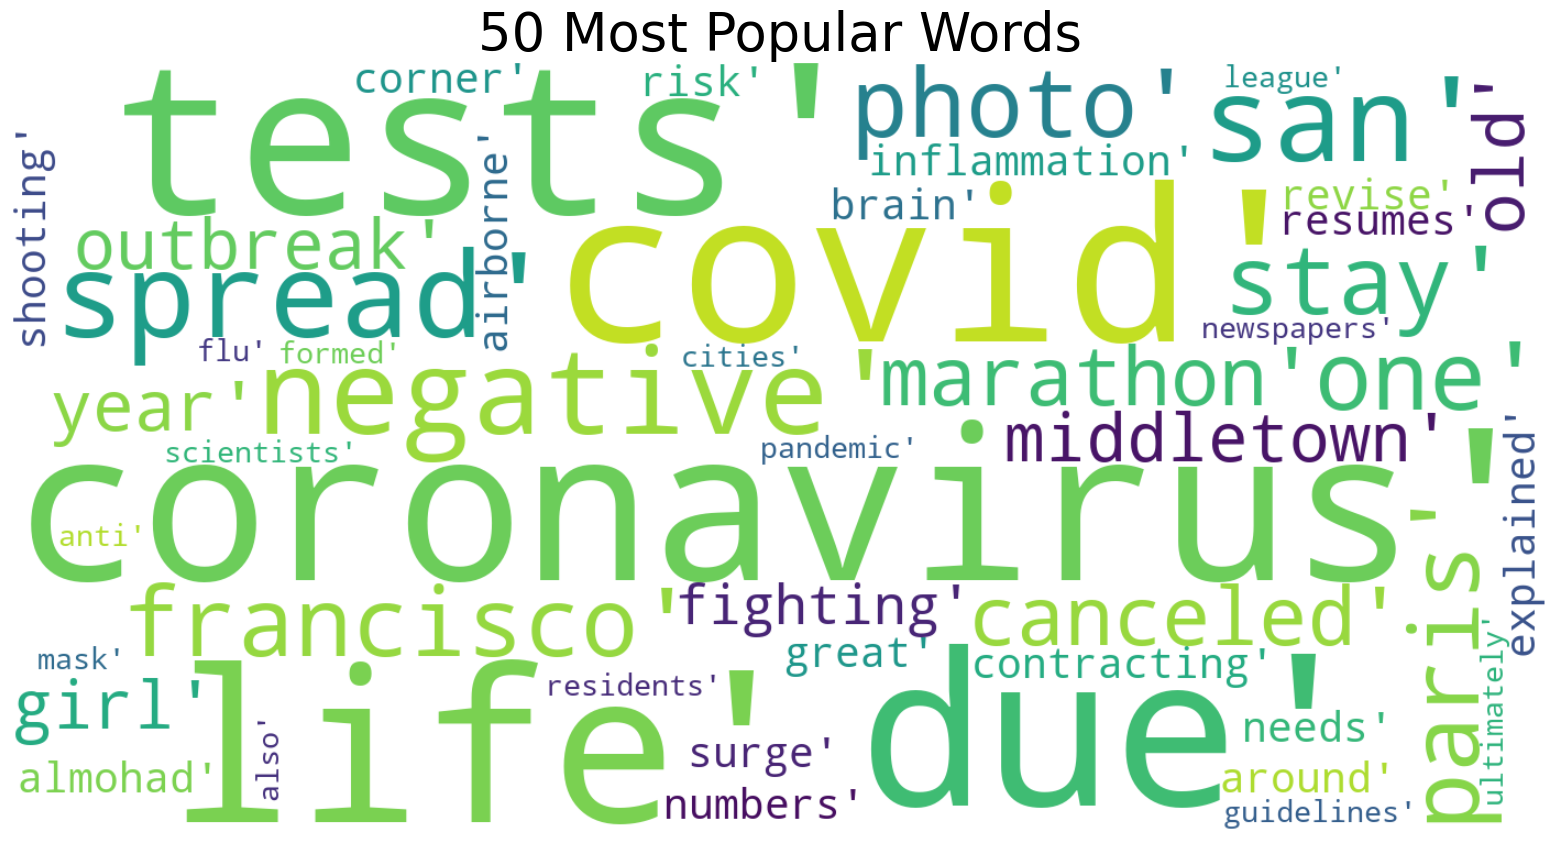

In [23]:
DataAnalyzer.plot_most_popular_words_map(
    most_popular_words=most_popular_words_false,
    most_popular_words_num=50,
    label_type=None
)

#### 3.4 Most Popular Words Histogram

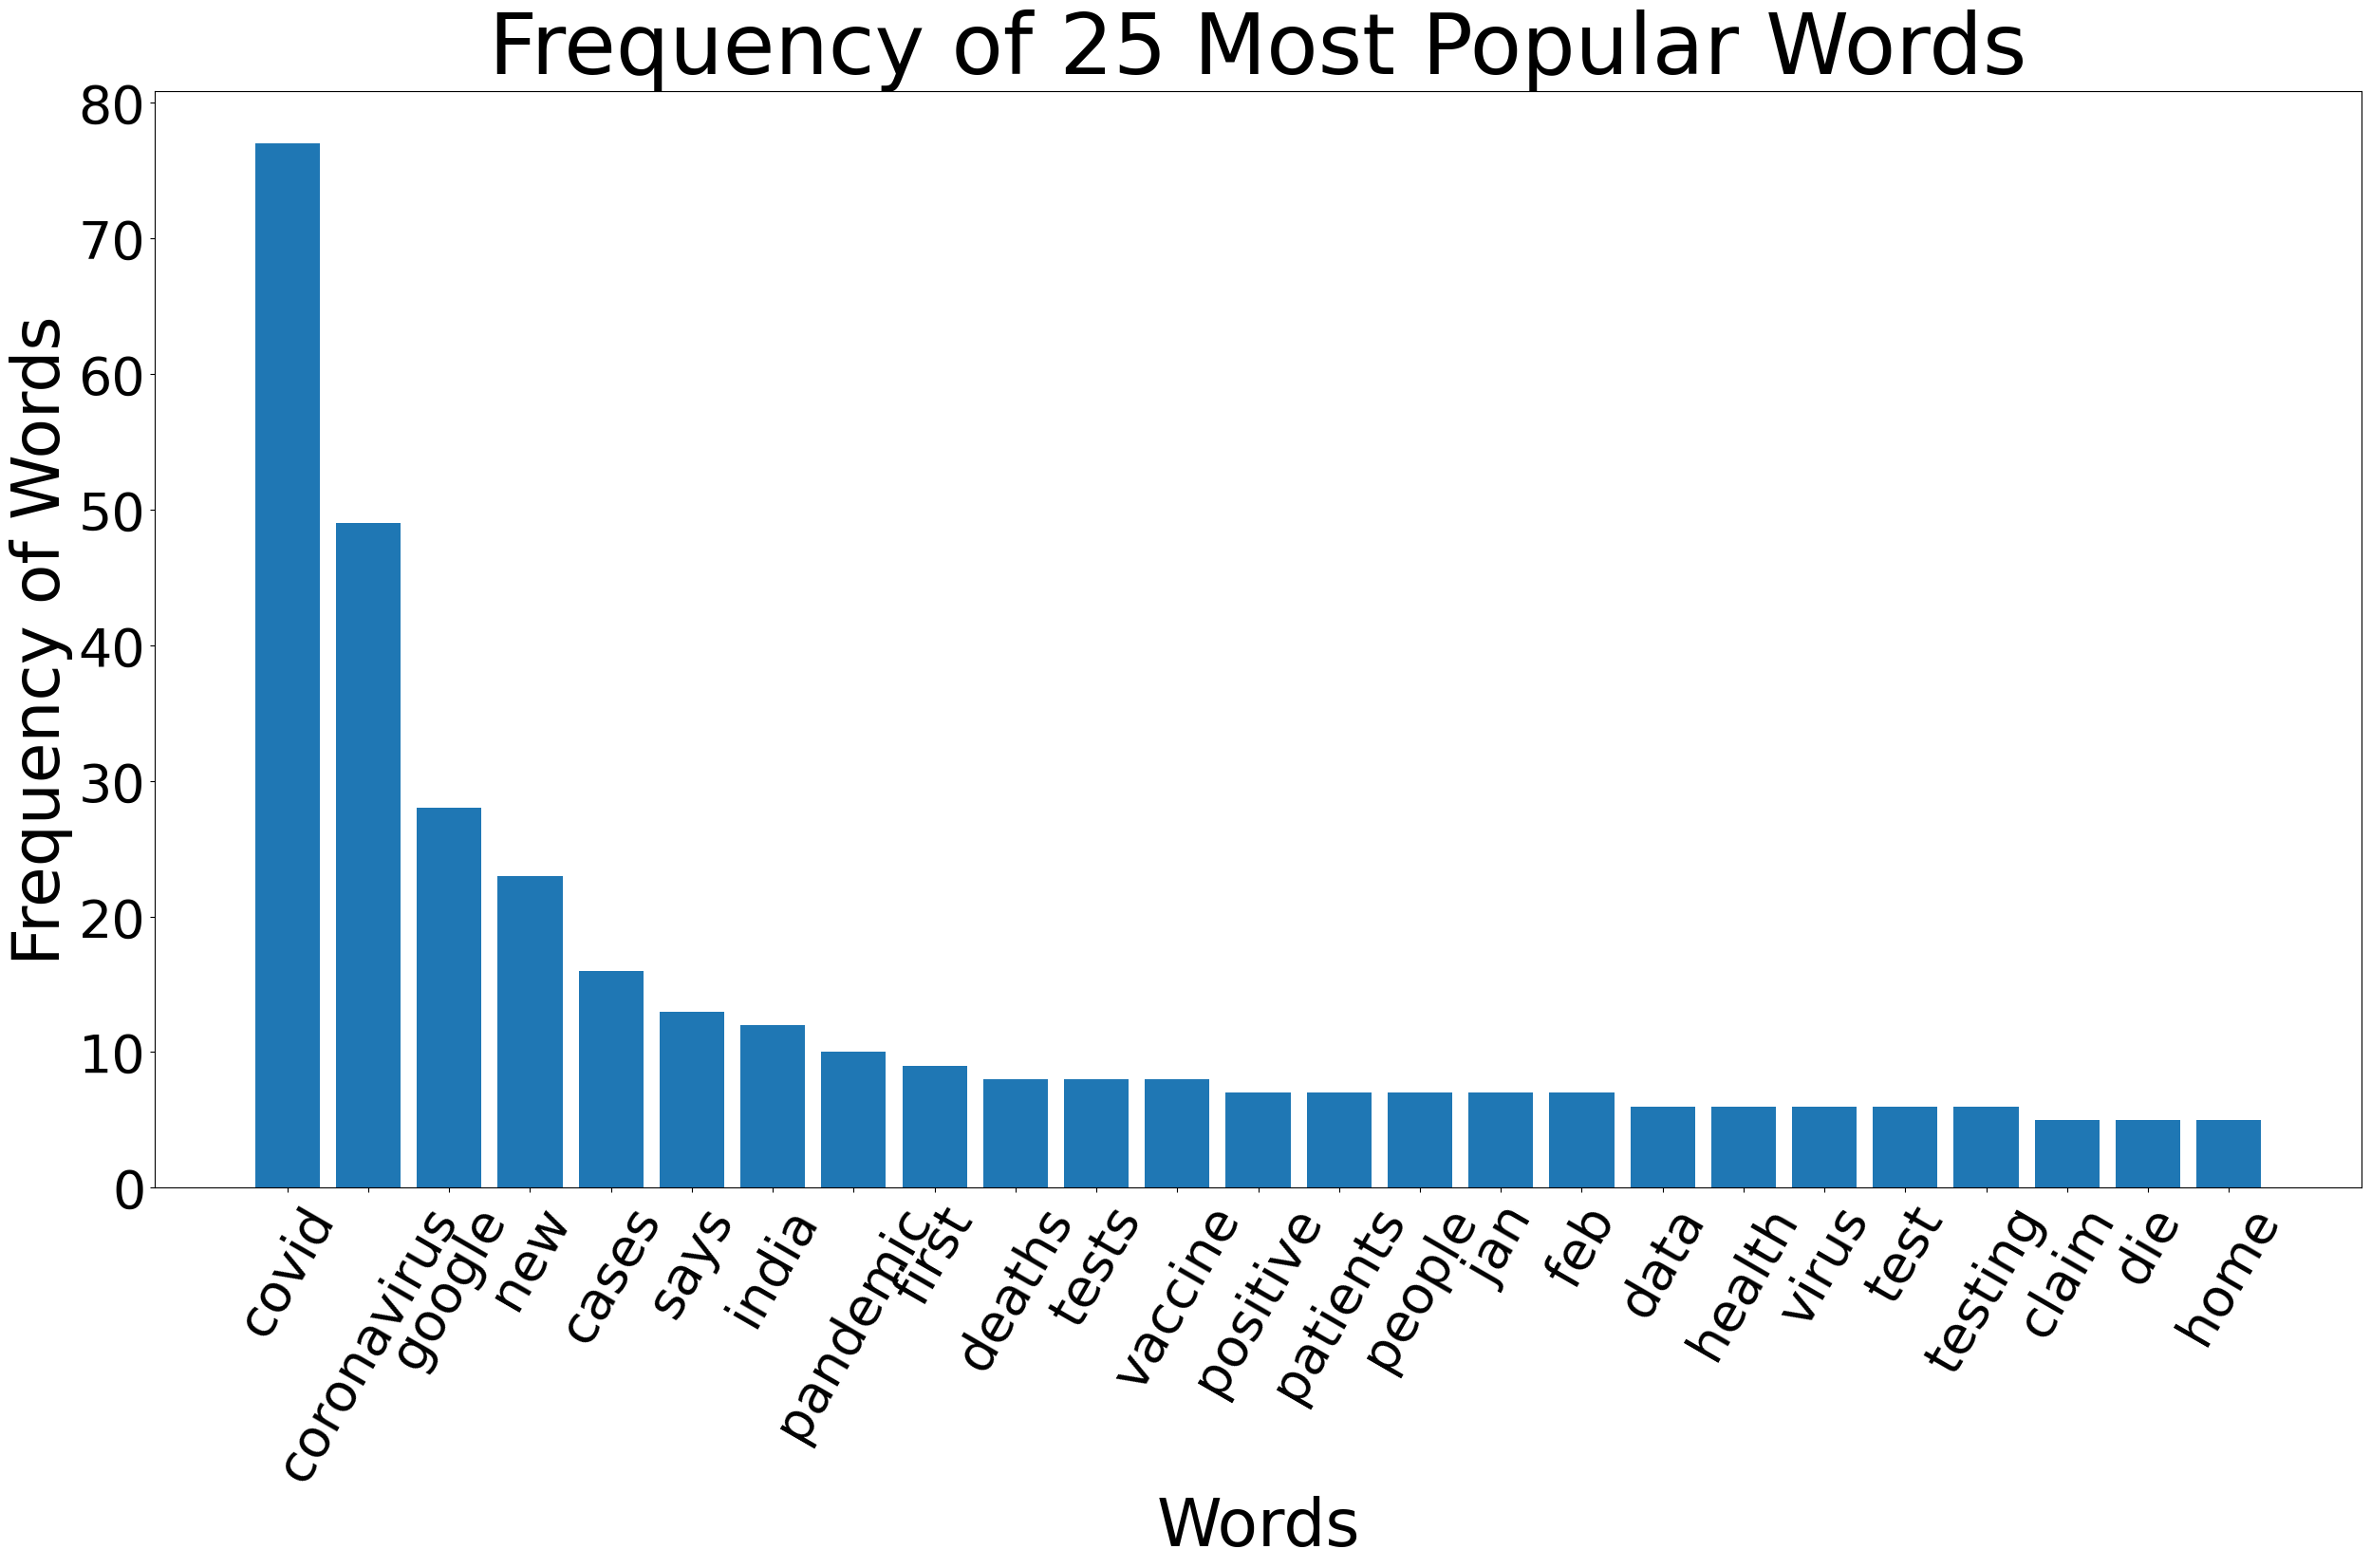

In [24]:
DataAnalyzer.plot_most_popular_words_histogram(
    most_popular_words=most_popular_words_correct,
    most_popular_words_num=25,
    label_type=None
)

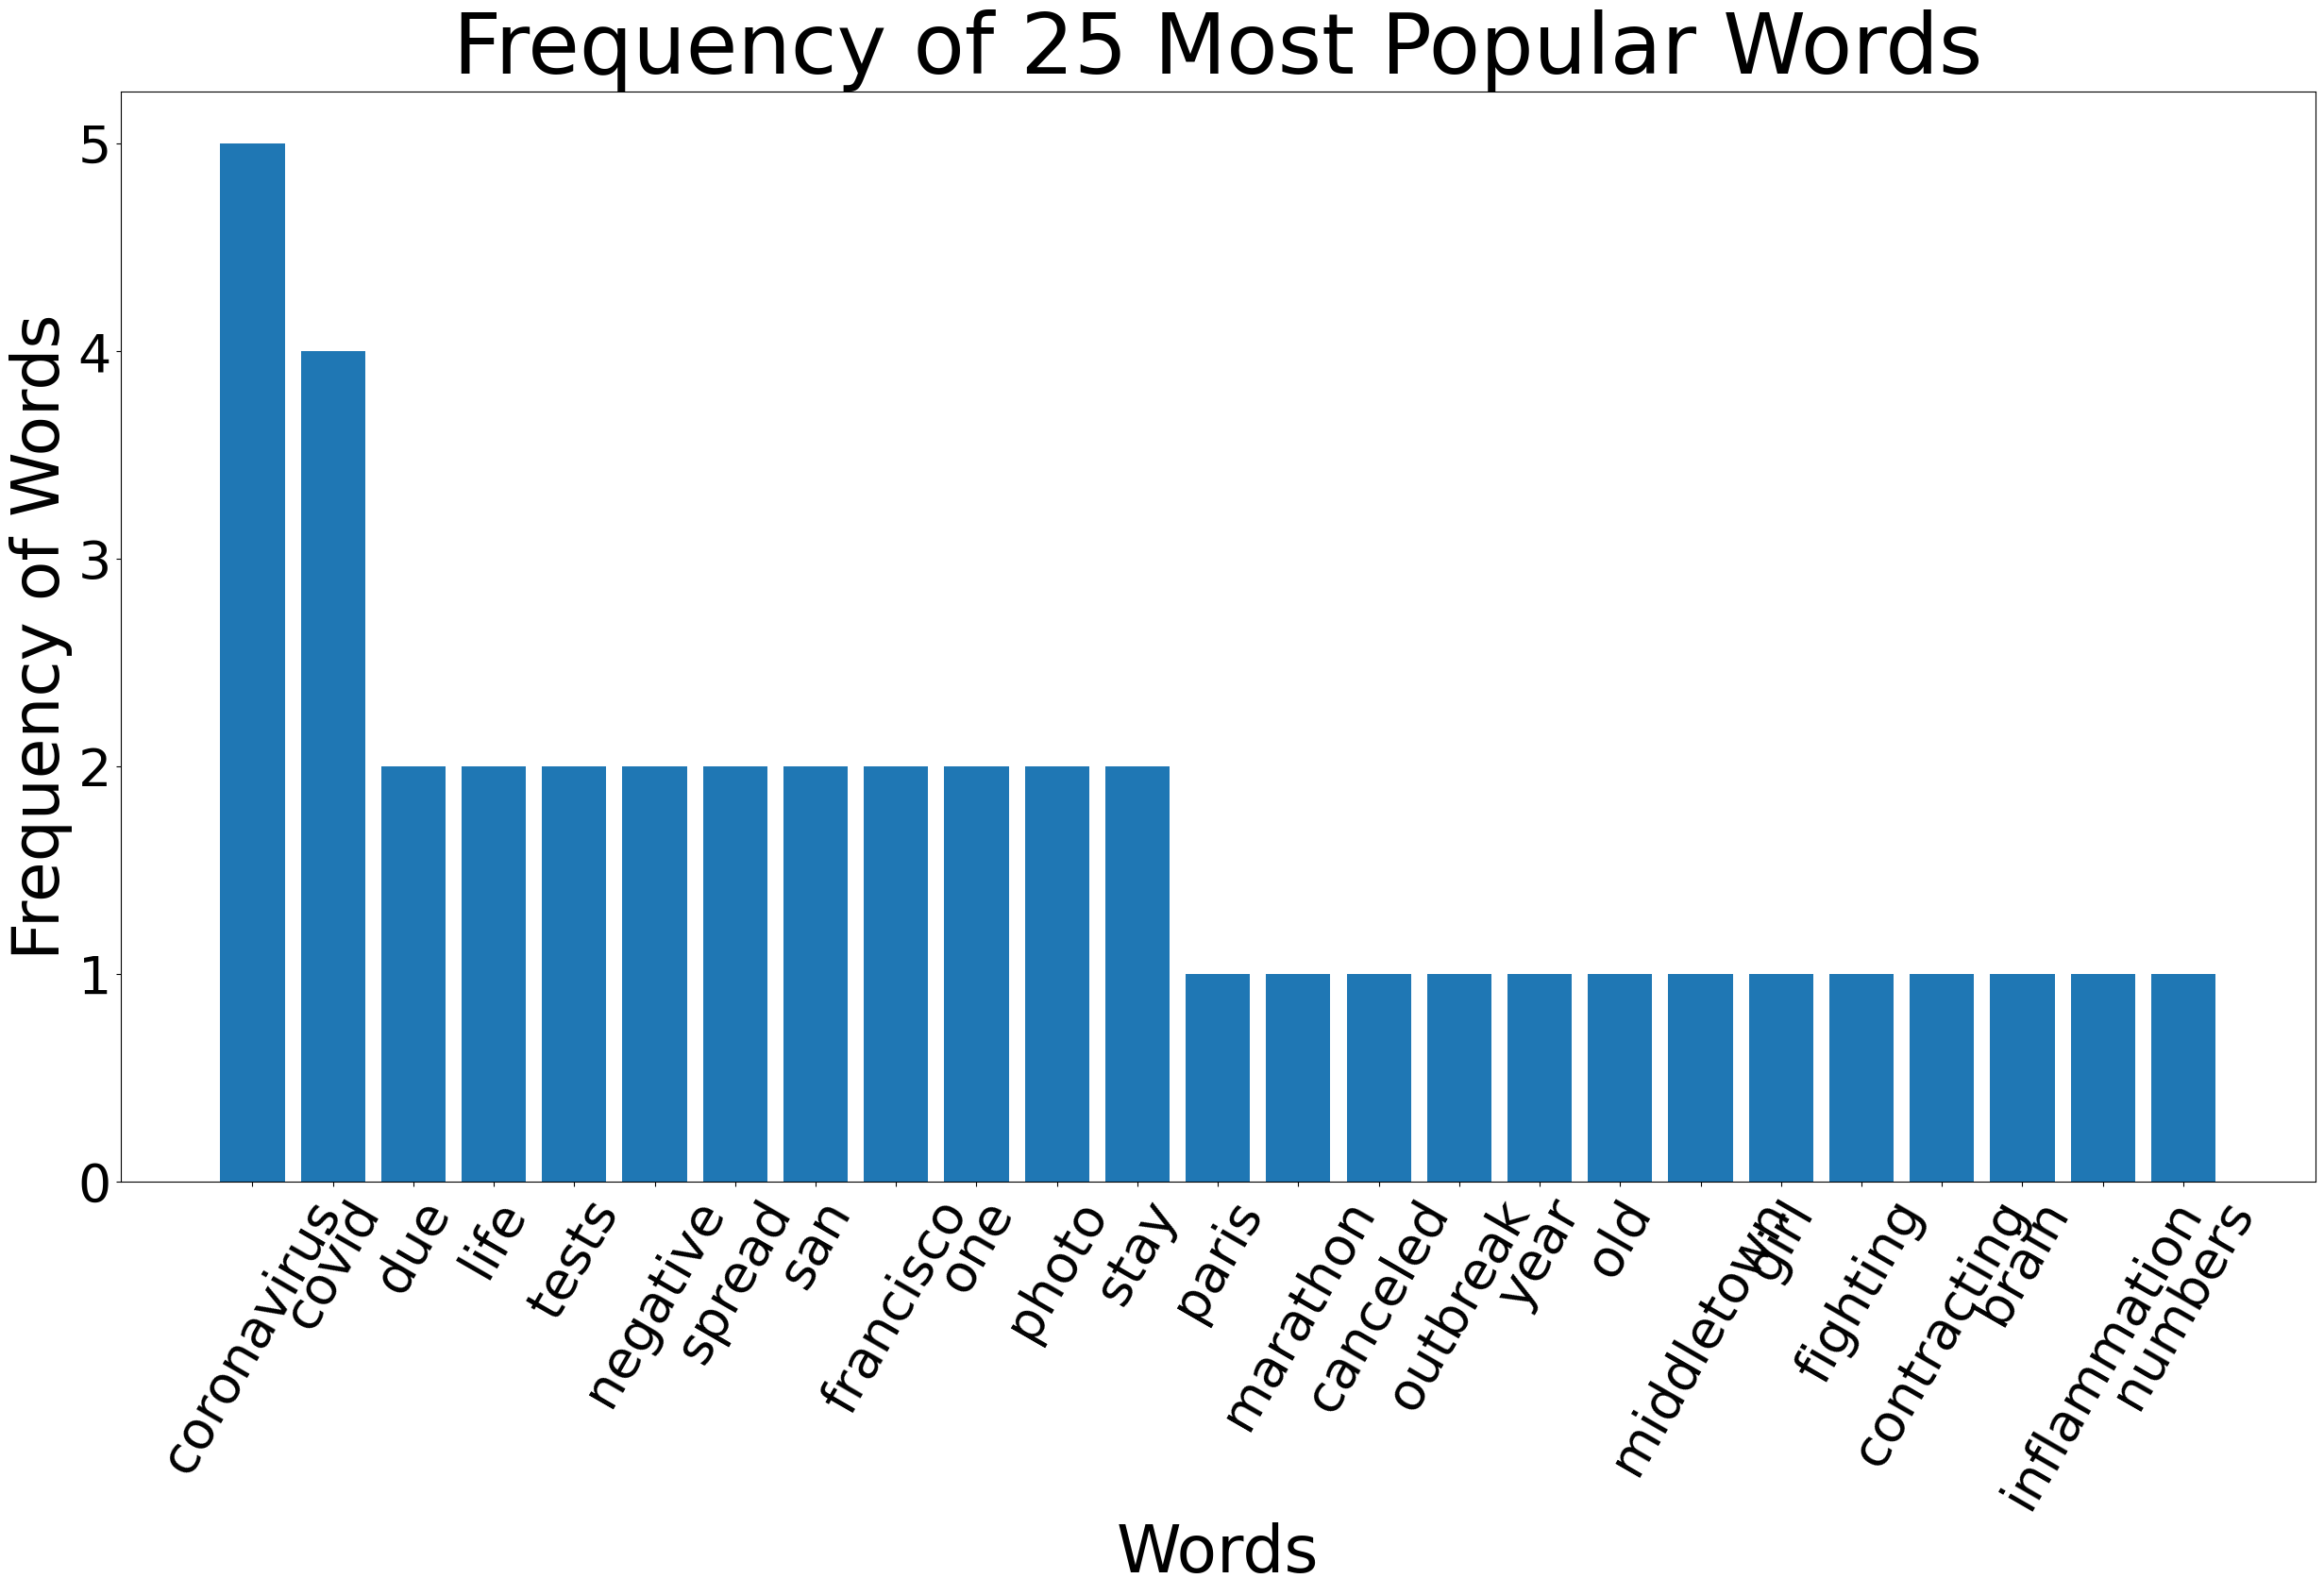

In [25]:
DataAnalyzer.plot_most_popular_words_histogram(
    most_popular_words=most_popular_words_false,
    most_popular_words_num=25,
    label_type=None
)

In [5]:
ACCURACY_TRAIN_PATH = "/Users/adamdabkowski/PycharmProjects/NLP-Project/series_data/accuracy_train_english.csv"
ACCURACY_VALIDATION_PATH = "/Users/adamdabkowski/PycharmProjects/NLP-Project/series_data/accuracy_validation_english.csv"
LOSS_TRAIN_PATH = "/Users/adamdabkowski/PycharmProjects/NLP-Project/series_data/loss_train_english.csv"
LOSS_VALIDATION_PATH = "/Users/adamdabkowski/PycharmProjects/NLP-Project/series_data/loss_validation_english.csv"

accuracy_train = pd.read_csv(ACCURACY_TRAIN_PATH)["Value"]
accuracy_validation = pd.read_csv(ACCURACY_VALIDATION_PATH)["Value"]
loss_train = pd.read_csv(LOSS_TRAIN_PATH)["Value"]
loss_validation = pd.read_csv(LOSS_VALIDATION_PATH)["Value"]

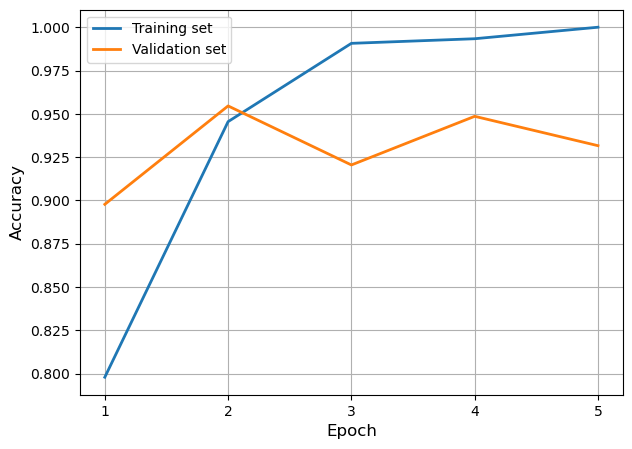

In [19]:
ModelEvaluator.plot_history(
    train_history=accuracy_train,
    validation_history=accuracy_validation,
    metric="Accuracy"
)

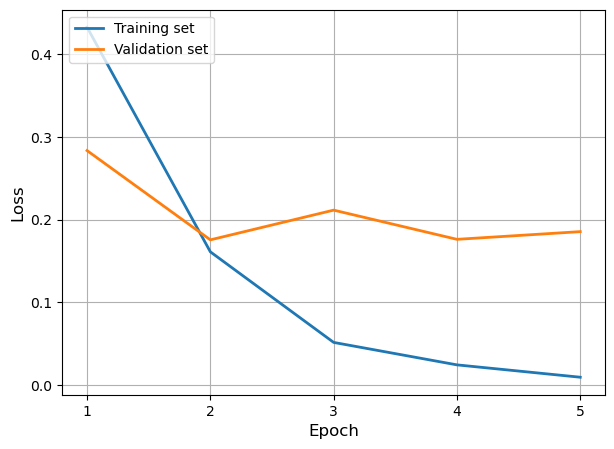

In [20]:
ModelEvaluator.plot_history(
    train_history=loss_train,
    validation_history=loss_validation,
    metric="Loss"
)